# Assignment 1 
Oumaima Jribi
Neptun code: E****4

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [9]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("6assign2.csv")

In [14]:
df = df.rename(columns={"Y": "Revenue", "X_1": "Duration", "X_2": "Imdb"})

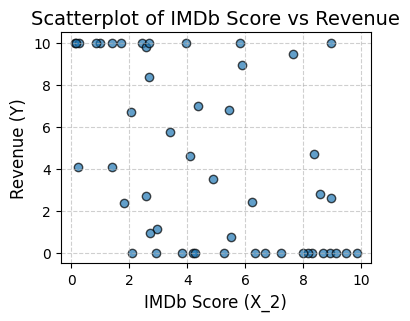

In [73]:
# Scatterplot of IMDb score vs Revenue
plt.figure(figsize=(4, 3))
plt.scatter(df['Imdb'], df['Revenue'], alpha=0.7, edgecolors='k')
plt.title('Scatterplot of IMDb Score vs Revenue', fontsize=14)
plt.xlabel('IMDb Score (X_2)', fontsize=12)
plt.ylabel('Revenue (Y)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

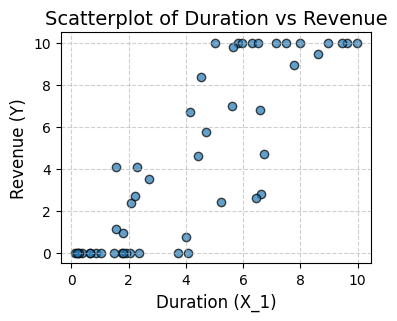

In [78]:
# Scatterplot of IMDb score vs Revenue
plt.figure(figsize=(4, 3))
plt.scatter(df['Duration'], df['Revenue'], alpha=0.7, edgecolors='k')
plt.title('Scatterplot of Duration vs Revenue', fontsize=14)
plt.xlabel('Duration (X_1)', fontsize=12)
plt.ylabel('Revenue (Y)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### The figures show a clear relationship between Revenue and Duration, however the ralationship with Imdb score is not so straightforward. This will be further assessed by the model.

In [67]:
# Separate the dependent variable (Y) and explanatory variables (X1, X2)
X = df[['Duration', 'Imdb']]
y = df['Revenue']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the linear regression model using OLS
model = sm.OLS(y, X).fit()

# Calculate standardized coefficients
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Duration', 'Imdb']])
#X_scaled = sm.add_constant(X_scaled)
model_scaled = sm.OLS(y, X_scaled).fit()

# Display results
results = {
    "Point_Estimates": model.params,
    "Standardized_Coefficients": model_scaled.params,
    "Summary": model.summary()
}
print("Results for regular model:")
results["Point_Estimates"]

Results for regular model:


const       2.153435
Duration    1.161937
Imdb       -0.558007
dtype: float64

**Regular coefficients**:

1.	Intercept (2.15):
When both Duration and IMDb Score are zero, the model predicts a baseline Revenue of 2.15 million dollars.
Note: Since a film cannot have a duration of zero or an IMDb score of zero, the intercept mainly serves as a mathematical starting point for the regression line and probably has no practical significance.
2.	Duration (1.16):
For each additional 10 minutes of film duration, the Revenue is expected to increase by approximately 1.16 million dollar, holding the IMDb score constant.
3.	IMDb Score (−0.558):
For each additional point increase in IMDb score, the Revenue is expected to decrease by approximately 0.558 million dollar, holding the Duration constant.
Note: The negative coefficient for Imdb score is counterintuitive as we expect movies with higher Imdb score to have a higher Revenue. This may warrant further investigation (e.g., checking for data issues or omitted variable bias).

**Linear model:**

Revenue = 2.15 + 1.16*Duration -0.558*Imdb_score

In [68]:
print("Results for standardized coefficients:")
results["Standardized_Coefficients"]

Results for standardized coefficients:


x1    3.347268
x2   -1.636396
dtype: float64

**Standardized Coefficients:**

The predictors are standardized (mean = 0, standard deviation = 1), but Revenue remains in its original units (million dollars).

1.	Standardized Duration (3.347): A one standard deviation increase in Duration is associated with an increase of approximately 3.347 million dollars in Revenue.
This coefficient reflects the strength and direction of the relationship between Duration and Revenue, adjusted for the variability in Duration.
2.	Standardized IMDb Score (−1.63): A one standard deviation increase in IMDb Score is associated with a decrease of approximately 1.63 million dollars in Revenue.

**Standardized coefficients allow for direct comparison of the relative importance of predictors because they are on the same scale (standard deviations).**
  
Since Revenue is not standardized, the coefficients represent the change in Revenue (in million dollars) for a one standard deviation change in the predictor.

Predicition:

In [70]:
# Predict revenue for X1 = 13 (130 minutes) and X2 = 8.5
new_observation = pd.DataFrame({'const': [1], 'Duration': [13], 'Imdb': [8.5]})
predicted_revenue = model.predict(new_observation)

print("Predicted Revenue: ", predicted_revenue[0])

Predicted Revenue:  12.51555278696932


Confidence Interval: 

In [71]:
# Compute 95% confidence intervals for coefficients
confidence_intervals = model.conf_int(alpha=0.05)
confidence_intervals.columns = ['Lower Bound', 'Upper Bound']

confidence_intervals

,Lower Bound,Upper Bound
const,1.055170,3.251701
Duration,1.009095,1.314778
Imdb,-0.708149,-0.407865


- With this model, we are 95% confident that the intercept will be a value between 1.055 and 3.25. This is the value we expect the revenue to fall within if Duration and Imdb score take values of 0
- For every additional 10 minutes of duration, we are 95% confident that the revenue is expected to increase by an amount between 1.009 and 1.315 million dollars.
- For every unit increase in the IMDb score, we are 95% confident that the revenue is expected to decrease by an amount between 0.708 and 0.408 million dollars.

**Prediction Interval:**

In [72]:
# 95% prediction interval for the specific new observation
prediction_interval = model.get_prediction(new_observation).summary_frame(alpha=0.05)
prediction_interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.515553,0.788186,10.929928,14.101178,9.041361,15.989744


obs_ci_lower (9.04) and obs_ci_upper (15.99) form a 95% prediction interval for the revenue of a single movie with X_1=13 (130 minutes) and X2=8.5

We are 95% confident that the revenue of an individual movie with these characteristics will fall between 9.04 and 15.99 million dollars.


In [69]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Extract R-squared and Adjusted R-squared
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

# Display the results
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")

R-squared: 0.8725
Adjusted R-squared: 0.8671


1. R²: 87.25% of the variance in the film’s revenue is explained by the film’s duration and IMDb score.

A high R² value suggests a strong relationship between the independent variables and the dependent variable. R² provides a measure of how well the model fits the data.

2. Adjusted R²: 86.7% of the variance in film revenue is explained by X1 and X2, after accounting for the number of predictors in the model.
   
In fact adjusted R² penalizes for the inclusion of extra explanatory vriables, in a way that only significant variables that improve the model fit re included.
It ensures that the measure of goodness-of-fit doesn’t artificially increase as more variables are added to the model. This makes it more reliable when comparing models with different numbers of predictors.

In [27]:
results["Summary"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     160.8
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           9.56e-22
Time:                        20:14:39   Log-Likelihood:                -90.879
No. Observations:                  50   AIC:                             187.8
Df Residuals:                      47   BIC:                             193.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1534      0.546      3.945      0.000       1.055       3.252
Duration       1.1619      0.076     15.294      0.000       1.009       1.315
Imdb          -0.5580      0.075     -7.477      0.000      -0.708      -0.408
==============================================================================
Omnibus:                        2.752   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.527
Skew:                          -0.078   Prob(JB):                        0.466
Kurtosis:                       2.158   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Model Diagnostic:

### Model Significance Tests

In [48]:
# Overall significance of the model (F-statistic)
f_pvalue = model.f_pvalue  # p-value for the F-test
f_statistic = model.fvalue  # F-statistic
print(f"F-statistic: {f_statistic}, p-value: {f_pvalue}")

F-statistic: 160.79753076816635, p-value: 9.558420326824548e-22


The F-statistic of 160.80 and its extremely small p-value (~0) indicate that the overall model is statistically significant, meaning that the predictors (DurationDuration and IMDbIMDb) collectively explain a significant amount of the variation in revenue.

### Testing Variable Significance: 

In [51]:
# Coefficient significance (t-tests)
coefficients = model.params
p_values = model.pvalues
t_statistics = model.tvalues
significance_results = pd.DataFrame({
    'Coefficient': coefficients,
    't-Statistic': t_statistics,
    'p-Value': p_values
})
significance_results

,Coefficient,t-Statistic,p-Value
const,2.153435,3.944540,2.651623e-04
Duration,1.161937,15.293681,7.161971e-20
Imdb,-0.558007,-7.476697,1.553644e-09


**Interpret:** The very small p-value (0.00026) indicate the intercept is statistically significant.
Duration and IMDb score: The extremely small p-value scores (~0) confirm these variables significance in the model.

In [53]:
# Calculate VIF only for the predictors (exclude constant term)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns[1:]  # Skip 'const'
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
print(vif_data)

    Feature       VIF
0  Duration  1.014388
1      Imdb  1.014388


The VIF values for both predictors (Duration and IMDb score) are approximately 1.01, which is well below the threshold of 5, indicating that multicollinearity is not present in the model.
**Why Multicollinearity Is a Problem:**

Multicollinearity occurs when predictors are highly correlated, inflating standard errors and making it difficult to determine the individual effect of each predictor on the dependent variable. Moreover, correlated explanatory variables cannot be included together significantly in the model, which might result in information loss due to ommitted variables.

### Error Term Analysis

In [77]:
# Mean of residuals
print(f"Mean of residuals (Expected value): {residuals.mean():.4f}")
# Shapiro-Wilk test for normality
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro(residuals).pvalue:.4f}")
# Durbin-Watson test for independence
print(f"Durbin-Watson Statistic: {durbin_watson(residuals):.4f}")
# Breusch-Pagan test for homoscedasticity
print(f"Breusch-Pagan Test: LM Statistic={bp_test[0]:.4f}, p-value={het_breuschpagan(residuals, model.model.exog)[1]:.4f}")
# Variance of residuals
print(f"Variance of residuals: {residuals.var():.4f}")

Mean of residuals (Expected value): 0.0000
Shapiro-Wilk Test: Statistic=0.9795, p-value=0.5293
Durbin-Watson Statistic: 2.1084
Breusch-Pagan Test: LM Statistic=1.1619, p-value=0.5594
Variance of residuals: 2.2648


**Interpretation:**
1. Expected Value: The mean of residuals is 0, satisfying the assumption that the errors have an expected value of zero.
2. Normality: The Shapiro-Wilk test (p-value = 0.5293, H0: the data is normally distributed) indicates that the residuals are normally distributed since the p-value is greater than 0.05 and we can't reject H0.
3. Independence: The Durbin-Watson statistic (2.1084) suggests that the residuals are independent, as it is close to the ideal value of 2.
4. Homoscedasticity: The Breusch-Pagan test (p-value = 0.5594, H0: homoscedasticity is present) indicates no evidence of heteroscedasticity, as we cannot reject H0, meaning the residuals have constant variance.
5. Variance of Residuals: The residual variance is estimated as 2.2648.